## Libnames

In [8]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, LinearSVR
#from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
#import lightgbm as lgb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer, f1_score, fbeta_score, roc_auc_score, auc, roc_curve, precision_score, recall_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut
from sklearn.neighbors import DistanceMetric

from scipy import stats

from time import time

## Funções  - data prep

In [ ]:
def standard_scaler_manual (data) :
    data2 = (data - data.mean())/data.std()
    return data2


def fit_transform_with_function (data, function, sklearn):
    scaler = function
    
    if sklearn == 'True':
        scaler = function
        data_transformed = scaler.fit_transform(data)
        data_transformed2 = pd.DataFrame(data_transformed, columns = data.columns, index = data.index)
        
    else:
        data_transformed2 = data.apply(function)
        
    return scaler, data_transformed2

#X_train.apply(standard_scaler_manual)


def transform_with_function (data, scaler, sklearn):
    
    if sklearn == 'True':
        data_transformed = scaler.transform(data)
        data_transformed2 = pd.DataFrame(data_transformed, columns = data.columns, index = data.index)
    
    else:
        data_transformed2 = data.apply(scaler)
    
        
    
    return data_transformed2



## Funções Modelagem

In [15]:
dataset = pd.read_csv('dados_Q3.csv')
dataset.head()

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [16]:
log_reg = LogisticRegression(penalty = 'l1', 
                             C = 1/.1, ##### INVERSE OF REGULARIZATION STRENGH
                             dual=False, tol=0.0001,  
                             fit_intercept = True,
                             intercept_scaling = 1, 
                             class_weight = None,
                             random_state = 42,
                             solver = 'liblinear', 
                             max_iter = 100, multi_class='ovr', 
                             verbose=0, warm_start=False, n_jobs=1)

In [19]:
cv_kfold = LeaveOneOut()
metrics = [f1_score, precision_score, recall_score,  accuracy_score] #roc_auc_score]


In [22]:
model_classif_cv(log_reg, X, y, KFold(5, random_state=42), metrics)

,f1_score- 1.Treino,f1_score- 2.Teste,precision_score- 1.Treino,precision_score- 2.Teste,recall_score- 1.Treino,recall_score- 2.Teste,accuracy_score- 1.Treino,accuracy_score- 2.Teste,ks - 1.Treino,ks - 2.Teste
0,0.731449,0.700730,0.915929,0.905660,0.608824,0.571429,0.936667,0.931667,0.660708,0.648948
1,0.711027,0.736842,0.921182,0.900000,0.578947,0.623762,0.936667,0.925000,0.649965,0.682692
2,0.710018,0.734375,0.918182,0.886792,0.578797,0.626667,0.931250,0.943333,0.643865,0.691429
3,0.721137,0.739130,0.914414,0.927273,0.595308,0.614458,0.934583,0.940000,0.670449,0.621146
4,0.721429,0.622951,0.930876,0.926829,0.588921,0.469136,0.935000,0.923333,0.647202,0.640120
mean,0.719012,0.706806,0.920117,0.909311,0.590159,0.581090,0.934833,0.932667,0.654438,0.656867


In [ ]:
model_classif_cv(log_reg, X, y, cv_kfold, metrics)

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefi

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefi

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefi

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefi

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefi

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefi

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefi

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefi

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefi

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: invalid value encountered in true_divide
  cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4775: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4780: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\lorra\Anaconda3\lib\site-packages\scipy\stats\stats.py:4774: RuntimeWarning: inv

In [11]:
def split_train_test_data (data, name_target, test_size, random_state):
    
    X_all = data.drop([name_target], axis = 1)
    y_all = data[name_target]

    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = test_size ,random_state = random_state)

    #print "Training set has {} samples and {} features.".format(X_train.shape[0], X_train.shape[1])
    #print "Testing set has {} samples and {} features.".format(X_test.shape[0], X_test.shape[1])
    
    X_train.reset_index(drop=True, inplace = True)
    X_test.reset_index(drop=True, inplace = True)
    y_train.reset_index(drop=True, inplace = True)
    y_test.reset_index(drop=True, inplace = True)
    
    return X_train, X_test, y_train, y_test

    
def add_missing_dummy_columns (new_data, train_columns):
    missing_cols = set(train_columns) - set(new_data_columns)
    for c in missing_cols:
        new_data[c] = 0

def fix_columns (new_data, train_columns):
    add_missing_dummy_columns(new_data, train_columns)
    assert(set(train_columns) - set(new_data.columns) == set())
    extra_cols = set(new_data.columns) - set(train_columns)
    if extra_cols:
        print('columns extra', extra_cols)
    new_data = new_data[train_columns]
    return new_data

def grid_search_model (x, y, clf, parameters, scorer, cv, verbose):
    grid_obj = GridSearchCV(clf, parameters, scoring = scorer, cv =  cv, verbose= verbose)
    start = time()
    grid_fit = grid_obj.fit(x, y)
    end = time()
    #print "Best score:" , grid_fit.best_score_
    #print "Best parameters:" , grid_fit.best_params_
    #print "Find best parameterers in {:.4f} seconds.".format(end - start) 
    return grid_fit, grid_fit.best_estimator_



def metrics_output (y_true, y_pred, y_prob1, y_prob0):
    
 
    m = { 
        'auc' : [roc_auc_score(y_true, y_prob1)],
        'f1' : [f1_score (y_true, y_pred)],
        'precision' :[ precision_score (y_true, y_pred)],
        'recall' :[ recall_score(y_true, y_pred)],
        'accuracy': [accuracy_score(y_true, y_pred)],
      
    }
    print(pd.DataFrame(m))
    #print '\n'
    print(classification_report (y_true, y_pred))
    #print '\n'
    print ('Matriz de confusão:')
    print (pd.DataFrame(confusion_matrix (y_true, y_pred)))

    
def model_classif_holdout (clf, X_train, y_train, X_test, y_test, metrics):
    
    clf2 = clf.fit(X_train, y_train)
       
    pred_train = clf2.predict(X_train)
    pred_test = clf2.predict(X_test)

    prob_train = clf2.predict_proba(X_train)
    prob_test = clf2.predict_proba(X_test)

    prob1_train = pd.DataFrame(prob_train).iloc[:,1]
    prob1_test = pd.DataFrame(prob_test).iloc[:,1]
    
    prob0_train = pd.DataFrame(prob_train).iloc[:,0]
    prob0_test = pd.DataFrame(prob_test).iloc[:,0]
    
    train_results = pd.concat([y_train, prob1_train], axis = 1)
    test_results = pd.concat([y_test, prob1_test], axis = 1)
    train_results.columns = ['y_train', 'prob1']
    test_results.columns = ['y_test', 'prob1']
    
    first_metric = True
    
    for metric in metrics:
            name_metric = metric.__name__
            
            if metric == roc_auc_score:
                m_tr = metric(y_train, prob1_train)
                m_te = metric(y_test, prob1_test)

            else:
                m_tr = metric(y_train, pred_train)
                m_te = metric(y_test, pred_test)
            
            m_tr_te = {
                '1.Treino': [m_tr],
                '2.Teste' : [m_te]
            }
            
            resultados_aux = pd.DataFrame(m_tr_te, index = [str(name_metric)])
            #print(resultados_aux)
            if first_metric == True:
                results_folds = resultados_aux
                first_metric = False
            else:
                results_folds = pd.concat([results_folds, resultados_aux], axis = 0)    
    
    train_prob1_True1 = train_results[train_results.y_train == 1][['prob1']]
    train_prob1_True0 = train_results[train_results.y_train == 0][['prob1']]
    
    test_prob1_True1 = test_results[test_results.y_test == 1][['prob1']]
    test_prob1_True0 = test_results[test_results.y_test == 0][['prob1']]
    
    
    m_tr_te_ks = {
                '1.Treino': [stats.ks_2samp(train_prob1_True1.prob1, train_prob1_True0.prob1).statistic],
                '2.Teste' : [stats.ks_2samp(test_prob1_True1.prob1, test_prob1_True0.prob1).statistic]
    }
    
    
    resultados_aux = pd.DataFrame(m_tr_te_ks, index = ['KS'])
    results_folds = pd.concat([results_folds, resultados_aux], axis = 0)    
    
    
    return results_folds

def model_classif_cv (model, X, y, cv, metrics):

    first = True

    for train_index, test_index in cv.split(X):
        #print(train_index)
        model2 = model.fit(X.iloc[train_index],y[train_index])
        
        pred_train = model2.predict(X.iloc[train_index])
        pred_test = model2.predict(X.iloc[test_index])
        
        prob_train = model2.predict_proba(X.iloc[train_index])
        prob_test = model2.predict_proba(X.iloc[test_index])

        prob1_train = pd.DataFrame(prob_train).iloc[:,1]
        prob1_test = pd.DataFrame(prob_test).iloc[:,1]

        prob0_train = pd.DataFrame(prob_train).iloc[:,0]
        prob0_test = pd.DataFrame(prob_test).iloc[:,0]
        
        y_train = y[train_index]
        y_test = y[test_index]
        
        train_results = pd.concat([y_train.reset_index(drop=True), prob1_train], axis = 1)
        test_results = pd.concat([y_test.reset_index(drop=True), prob1_test], axis = 1)
        train_results.columns = ['y_train', 'prob1']
        test_results.columns = ['y_test', 'prob1']
            
        first_metric = True
        for metric in metrics:
            name_metric = metric.__name__
            
            if metric == roc_auc_score:
                m_tr = metric(y_train, prob1_train)
                m_te = metric(y_test, prob1_test)
                
            else:
                m_tr = metric(y_train, pred_train)
                m_te = metric(y_test, pred_test)
            
            m_tr_te = {
                str(name_metric) +'- 1.Treino': [m_tr],
                str(name_metric) +'- 2.Teste' : [m_te]
            }
            resultados_aux = pd.DataFrame(m_tr_te)
            
            if first_metric == True:
                results_folds = resultados_aux
                first_metric = False
            else:
                results_folds = pd.concat([results_folds, resultados_aux], axis = 1)    
                
        train_prob1_True1 = train_results[train_results.y_train == 1][['prob1']]
        train_prob1_True0 = train_results[train_results.y_train == 0][['prob1']]
        
        test_prob1_True1 = test_results[test_results.y_test == 1][['prob1']]
        test_prob1_True0 = test_results[test_results.y_test == 0][['prob1']]
        
        m_tr_te_ks = {
                    'ks - 1.Treino': [stats.ks_2samp(train_prob1_True1.prob1, train_prob1_True0.prob1).statistic],
                    'ks - 2.Teste' : [stats.ks_2samp(test_prob1_True1.prob1, test_prob1_True0.prob1).statistic]
        }  
                       
        resultados_aux = pd.DataFrame(m_tr_te_ks)
        results_folds = pd.concat([results_folds, resultados_aux], axis = 1)    
    
        if first == True:
            results = results_folds
            first = False
        else:
            results = pd.concat([results, results_folds], axis = 0)    

    results.index = range(cv.get_n_splits(X))
    results_mean = np.transpose(pd.DataFrame(results.mean(), columns=['mean']))
    results = pd.concat([results, results_mean], axis = 0)

    return results


def tabela_percentis_recall_precision (data, name_prob1 , name_true, quantiles):
    data.sort_values(by = name_prob1, inplace=True, ascending=False)
    data.reset_index(inplace=True, drop=True)
    first=True
    for i, q in enumerate(quantiles):
        tam = data.shape[0]*q
        #print ('tam =', tam, 'q = ', q)
        tam  = round(tam)
        aux = data.index[0:tam]
        aux = np.array(aux)
        data2 = data.iloc[aux,:]
        #print (data2[name_true])
        recall = (data2[name_true].sum()*0.1)/(data[name_true].sum()*0.1)
        info = {
            'a. percentil' : q,
            'b. quantidade' : tam,
            'c. ponto de corte' : min(data2[name_prob1]),
            'd. recall' : recall,
            'e. precision': precision_score(data2[name_true], np.repeat(1,tam))
        }
        resultados_aux = pd.DataFrame(info, index = [str(i)])
                #print(resultados_aux)
        if first == True:
            results = resultados_aux
            first = False
        else:
            results = pd.concat([results, resultados_aux], axis = 0)    

    print(results)
    
def plot_roc_curve (y_true, prob1):
    fpr, tpr, _ = roc_curve(y_true, prob1)
    auc = roc_auc_score(y_true, prob1)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [264]:
def resp_freq (data, resp):
    count = pd.DataFrame(data[resp].value_counts())
    percent = pd.DataFrame(data[resp].value_counts(normalize=True)*100)
    table = pd.concat([count, percent], axis=1)
    table.columns = ['# target', '% target']
    return table

In [265]:
def information_data (data):
       
    len_array = []
    for var in data.columns:
        current_len  = len(data[var].unique())
        len_array.append(current_len)

    missing = pd.DataFrame(np.array(data.isnull().sum()), columns = ['missing'])
    p_missing = missing / data.shape[0]
    types = pd.DataFrame( np.array(data.dtypes), columns=['type'])

    qtd = pd.concat([pd.DataFrame(data.columns), types.type, missing.missing, pd.DataFrame(p_missing),  pd.DataFrame(len_array)], axis = 1)
    qtd.columns = ['var', 'type', '# missing','% missing', '# unique values']
    
    print 'Data with', data.shape[0], 'samples and ', data.shape[1], 'features'
    print '\n'
    print 'Data with', qtd[qtd['# missing'] > 0].shape[0], 'columns with missings'
    print '\n'
    
    return qtd

### Dados

In [266]:
data = pd.read_csv('data_classif.csv', sep=';')
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
1,0,-0.560476,-0.995799,-0.511604,-0.150307,0.196550,1,0,0,0
2,0,-0.230177,-1.039955,0.236938,-0.327757,0.650113,1,0,0,0
3,0,1.558708,-0.017980,-0.541589,-1.448165,0.671004,0,0,1,0
4,0,0.070508,-0.132175,1.219228,-0.697285,-1.284158,1,1,1,0
5,0,0.129288,-2.549343,0.174136,2.598490,-2.026110,1,0,0,1


In [267]:
information_data(data)

Data with 1000 samples and  10 features


Data with 0 columns with missings




,var,type,# missing,% missing,# unique values
0,y,int64,0,0.0,2
1,x1,float64,0,0.0,1000
2,x2,float64,0,0.0,1000
3,x3,float64,0,0.0,1000
4,x4,float64,0,0.0,1000
5,x5,float64,0,0.0,1000
6,x6,int64,0,0.0,2
7,x7,int64,0,0.0,2
8,x8,int64,0,0.0,2
9,x9,int64,0,0.0,2


In [268]:
resp_freq(data, 'y')

,# target,% target
0,567,56.7
1,433,43.3


In [269]:
X_train, X_test, y_train, y_test = split_train_test_data(data, 'y', test_size = 0.30 ,random_state = 791231)

Training set has 700 samples and 9 features.
Testing set has 300 samples and 9 features.


### data prep - normalização dos dados - usando a biblioteca e usando uma função específica

In [270]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler = MinMaxScaler()


In [271]:
scaler, X_train_final = fit_transform_with_function(X_train,  StandardScaler(), 'True')
X_train_final.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,-1.090149,-0.153272,0.797115,-0.408674,0.693236,0.493294,-0.314485,1.031938,1.956422
1,0.444613,-1.786853,1.103316,1.281525,1.144758,0.493294,-0.314485,-0.969050,-0.511137
2,0.049012,-0.807943,0.855621,0.299531,0.107202,0.493294,3.179797,1.031938,-0.511137
3,0.633273,-1.014264,0.920549,0.757588,0.354109,0.493294,-0.314485,-0.969050,1.956422
4,0.233675,-0.275690,1.305267,-1.002249,-1.008031,0.493294,-0.314485,-0.969050,-0.511137


In [272]:
X_test_final = transform_with_function(X_test, scaler, 'True')
X_test_final.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,-0.348308,-0.604918,-0.405015,-0.844799,-1.254040,0.493294,-0.314485,-0.969050,-0.511137
1,0.394544,0.081692,-0.662586,-0.432473,0.239425,-2.027187,-0.314485,1.031938,-0.511137
2,1.145093,0.816318,0.634703,1.180621,-0.811307,0.493294,-0.314485,-0.969050,-0.511137
3,-1.804453,0.666753,0.786704,-0.247415,-1.440903,-2.027187,3.179797,-0.969050,-0.511137
4,-0.114207,0.142043,0.429938,0.790188,-0.708435,0.493294,-0.314485,-0.969050,-0.511137


In [273]:
X_train_final = X_train.copy()
X_test_final = X_test.copy()

# Modelagem -- arrumar explicações

Objetivos:
Criar funções de:

#### 1. Validação cruzada com grid search (aplicável pra Lasso, Ridge ou outras funcoes que variam ou não parâmetros)
    
##### Nome função: grid_search_model (x, y, clf, parameters, scorer, cv)

X -> base_explicativas

y -> base_resposta

clf -> modelo sklearn

parameters -> parâmetros pra variar tune

scorer -> métrica utilizada para avaliar melhores parâmetros

cv -> objeto de cross-validation (KFold, StratifiedKFold, etc)
 
A função exporta: melhor modelo
Print: melhor score, melhor parâmetro, tempo.


####  2. Validação cruzada sem grid search (aplicável pra qualquer modelo) - exporta métricas (mae, mse,r2) para cada fold e respectivas médias (dentro das partições)

##### Nome função: model_classif_cv (model, X, y, cv):

X -> base_explicativas

y -> base_resposta

model -> modelo sklearn

cv -> objeto de cross-validation (KFold, StratifiedKFold, etc)

A função exporta: treino e teste das partições do cv com mae, mse, r2
Print - coeficientes

#### 3. HoldOut - resultados e fit do modelo em uma base treino específica e aplicação na base teste com  métricas

##### Nome função: model_reg_holdout (reg, X_train, y_train, X_test, y_test)

X_train -> base_explicativas - treino

y_train -> base_resposta - treino

X_test -> base_explicativas - teste

y_test -> base_resposta - teste

reg -> modelo sklearn

A função exporta: treino e teste  com mae, mse, r2


### medidas e tipo cv

In [274]:
metrics = [f1_score, precision_score, recall_score,  accuracy_score] #roc_auc_score]
#metrics = [f1_score, precision_score, recall_score,  accuracy_score, roc_auc_score]

cv_kfold = KFold(6, random_state=12)
cv_loo = LeaveOneOut()

<a id='knn'></a>
## KNN

#--------------------------------- como colocar mahalanobis em grid search? não sabemos ----------------#

<a id='knn_Maha'></a>
### Aplicação Mahalanobis 

In [275]:
DistanceMetric.get_metric('mahalanobis', V=np.cov(X_train_final))
clf_m = KNeighborsClassifier(5, algorithm='brute', metric = 'mahalanobis', metric_params = {'V': np.cov(X_train_final)})
clf_m.fit(X_train_final, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
           metric_params={'V': array([[ 0.54953,  0.10569, ...,  0.00954,  0.40262],
       [ 0.10569,  0.90496, ..., -0.37255,  0.30611],
       ...,
       [ 0.00954, -0.37255, ...,  0.57472,  0.0526 ],
       [ 0.40262,  0.30611, ...,  0.0526 ,  0.47378]])},
           n_jobs=1, n_neighbors=5, p=2, weights='uniform')

In [276]:
model_classif_holdout(clf_m, X_train_final, y_train, X_test_final, y_test, metrics)
#clf

,1.Treino,2.Teste
f1_score,0.932070,0.919540
precision_score,0.904908,0.888889
recall_score,0.960912,0.952381
accuracy_score,0.938571,0.930000
KS,0.882032,0.866174


<a id='knn_GridSearch'></a>
#### Grid Search

In [213]:
clf = KNeighborsClassifier()
parameters = {
    'weights' : ['uniform', 'distance'],
    'n_neighbors': [1,2,3,4,5,6] ,
    'algorithm': ['auto']
}
grid, model = grid_search_model(X_train_final, y_train, clf, parameters, 'roc_auc', cv_kfold, 0 )
model

Best score: 0.936020152598
Best parameters: {'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'auto'}
Find best parameterers in 1.4350 seconds.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [214]:
model_classif_holdout(model, X_train_final, y_train, X_test_final, y_test, metrics)


,1.Treino,2.Teste
f1_score,1.0,0.864286
precision_score,1.0,0.785714
recall_score,1.0,0.960317
accuracy_score,1.0,0.873333
KS,1.0,0.787630


Resultados por split e geral pra cada combinação do grid search:

In [215]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_algorithm,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,...,split3_test_score,split3_train_score,split4_test_score,split4_train_score,split5_test_score,split5_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003833,0.005167,0.832294,1.000000,auto,1,uniform,"{u'n_neighbors': 1, u'weights': u'uniform', u'...",11,0.800720,...,0.877717,1.000000,0.819952,1.000000,0.826923,1.000000,1.462474e-03,0.000687,0.027981,0.000000
1,0.003167,0.005333,0.832294,1.000000,auto,1,distance,"{u'n_neighbors': 1, u'weights': u'distance', u...",11,0.800720,...,0.877717,1.000000,0.819952,1.000000,0.826923,1.000000,3.726510e-04,0.000471,0.027981,0.000000
2,0.003000,0.006833,0.878192,0.984138,auto,2,uniform,"{u'n_neighbors': 2, u'weights': u'uniform', u'...",10,0.847989,...,0.935839,0.980600,0.870205,0.984910,0.896184,0.984665,1.527545e-03,0.006491,0.033603,0.001890
3,0.002000,0.004667,0.885238,1.000000,auto,2,distance,"{u'n_neighbors': 2, u'weights': u'distance', u...",9,0.854892,...,0.937349,1.000000,0.875409,1.000000,0.902344,1.000000,1.123916e-07,0.001106,0.030827,0.000000
4,0.002333,0.004500,0.908511,0.975593,auto,3,uniform,"{u'n_neighbors': 3, u'weights': u'uniform', u'...",8,0.898409,...,0.951389,0.975523,0.918525,0.976467,0.914964,0.975714,4.713985e-04,0.000764,0.024656,0.002425
5,0.002167,0.004000,0.917452,1.000000,auto,3,distance,"{u'n_neighbors': 3, u'weights': u'distance', u...",7,0.903211,...,0.953200,1.000000,0.928040,1.000000,0.931490,1.000000,3.727043e-04,0.001000,0.023377,0.000000
6,0.002167,0.004167,0.918820,0.972791,auto,4,uniform,"{u'n_neighbors': 4, u'weights': u'uniform', u'...",6,0.905012,...,0.965882,0.971906,0.931311,0.970731,0.910907,0.972311,3.726688e-04,0.001067,0.023983,0.001998
7,0.002333,0.004667,0.927587,1.000000,auto,4,distance,"{u'n_neighbors': 4, u'weights': u'distance', u...",3,0.915666,...,0.972222,1.000000,0.935920,1.000000,0.927133,1.000000,4.714266e-04,0.001106,0.023045,0.000000
8,0.002167,0.003833,0.925150,0.970108,auto,5,uniform,"{u'n_neighbors': 5, u'weights': u'uniform', u'...",5,0.908313,...,0.969807,0.966014,0.926554,0.971246,0.915865,0.969754,3.726865e-04,0.000373,0.020733,0.001990
9,0.002000,0.004333,0.933841,1.000000,auto,5,distance,"{u'n_neighbors': 5, u'weights': u'distance', u...",2,0.918367,...,0.977204,1.000000,0.934285,1.000000,0.931641,1.000000,5.773084e-04,0.000471,0.020430,0.000000


####  CV

In [216]:
model_classif_cv(model, X_train_final, y_train, cv_kfold, metrics)

,f1_score- 1.Treino,f1_score- 2.Teste,precision_score- 1.Treino,precision_score- 2.Teste,recall_score- 1.Treino,recall_score- 2.Teste,accuracy_score- 1.Treino,accuracy_score- 2.Teste,ks - 1.Treino,ks - 2.Teste
0,1.0,0.841121,1.0,0.775862,1.0,0.918367,1.0,0.854701,1.0,0.736194
1,1.0,0.810811,1.0,0.714286,1.0,0.937500,1.0,0.820513,1.0,0.728261
2,1.0,0.828829,1.0,0.793103,1.0,0.867925,1.0,0.837607,1.0,0.711675
3,1.0,0.884615,1.0,0.821429,1.0,0.958333,1.0,0.897436,1.0,0.866848
4,1.0,0.838710,1.0,0.776119,1.0,0.912281,1.0,0.827586,1.0,0.742194
5,1.0,0.827586,1.0,0.750000,1.0,0.923077,1.0,0.827586,1.0,0.736779
mean,1.0,0.838612,1.0,0.771800,1.0,0.919580,1.0,0.844238,1.0,0.753659


#### 1. exemplo de:
- ajuste de modelo;
- salvar probabilidades preditas;
- Extrair somente métricas após fazer o ajuste de um modelo;
- salvar uma base com os dados da base treino e resposta final;
- plot da ROC

In [217]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [218]:
model = model.fit(X_train_final, y_train)

y_test_pred = model.predict(X_test_final)
y_train_pred = model.predict(X_train_final)

test_probs = pd.DataFrame(model.predict_proba(X_test_final), columns = ['prob0', 'prob1'])
train_probs = pd.DataFrame(model.predict_proba(X_train_final), columns = ['prob0', 'prob1'])

test_prob1 = test_probs.iloc[:,1]
test_prob0 = test_probs.iloc[:,0]
train_prob1 = train_probs.iloc[:,1]
train_prob0 = train_probs.iloc[:,0]



In [219]:
metrics_output(y_test, y_test_pred, test_prob1, test_prob0)

   accuracy       auc        f1  precision    recall
0  0.873333  0.957033  0.864286   0.785714  0.960317


             precision    recall  f1-score   support

          0       0.97      0.81      0.88       174
          1       0.79      0.96      0.86       126

avg / total       0.89      0.87      0.87       300



Matriz de confusão:
     0    1
0  141   33
1    5  121


In [220]:
metrics_output(y_train, y_train_pred, train_prob1, train_prob0)

   accuracy  auc   f1  precision  recall
0       1.0  1.0  1.0        1.0     1.0


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       393
          1       1.00      1.00      1.00       307

avg / total       1.00      1.00      1.00       700



Matriz de confusão:
     0    1
0  393    0
1    0  307


### Base com informações de treino / teste - útil para plots e cálculo KS

In [222]:
train_results = pd.concat([X_train_final, y_train, train_prob1], axis = 1)
test_results = pd.concat([X_test_final, y_test, test_prob1], axis = 1)

test_results.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y,prob1
0,-0.326144,-0.576619,-0.400603,-0.836165,-1.300547,1,0,0,0,0,0.136145
1,0.388365,0.121670,-0.655363,-0.434319,0.199846,0,0,1,0,0,0.000000
2,1.110277,0.868793,0.627765,1.137770,-0.855760,1,0,0,0,1,1.000000
3,-1.726730,0.716683,0.778107,-0.253966,-1.488277,0,1,0,0,0,0.000000
4,-0.100975,0.183048,0.425235,0.757262,-0.752411,1,0,0,0,1,1.000000


#### ks

In [223]:
train_prob1_True1 = train_results[train_results.y == 1][['prob1']]
train_prob1_True0 = train_results[train_results.y == 0][['prob1']]
print ('ks:',stats.ks_2samp(train_prob1_True1.prob1, train_prob1_True0.prob1))


test_prob1_True1 = test_results[test_results.y == 1][['prob1']]
test_prob1_True0 = test_results[test_results.y == 0][['prob1']]
print('ks:', stats.ks_2samp(test_prob1_True1.prob1, test_prob1_True0.prob1))


('ks:', Ks_2sampResult(statistic=1.0, pvalue=4.4676476244174303e-153))
('ks:', Ks_2sampResult(statistic=0.78762999452654625, pvalue=4.8877839561056113e-41))


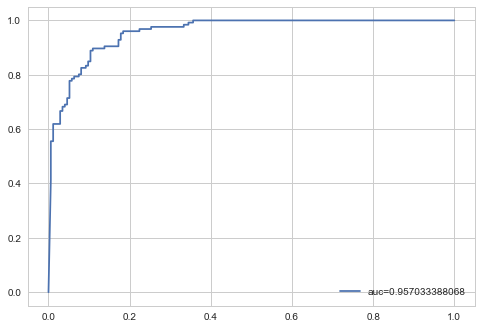

In [224]:
plot_roc_curve(test_results.y, test_results.prob1)

#### Histograma dos 1's e 0's 

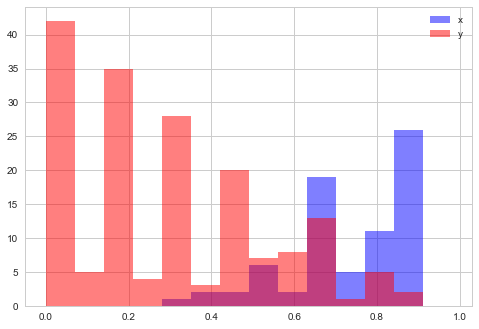

In [225]:
bins=np.arange(0,1,0.07)
plt.hist(np.array(test_prob1_True1.reset_index(drop=True)),bins=bins , alpha=0.5, color = 'blue', label='x')
plt.hist(np.array(test_prob1_True0.reset_index(drop=True)), bins= bins, alpha=0.5, color='red', label='y')
plt.legend(loc='upper right')
plt.show()

<a id='knn_cut'></a>
#### KNN - Métricas utilizando um ponto de corte
2.exemplo para extrair métricas mudando ponto de corte.: ex 0,70, após fazer ajuste de um modelo

In [226]:
ponto_de_corte = 0.7

model = model.fit(X_train_final, y_train)
y_test_pred = []

test_probs = pd.DataFrame(model.predict_proba(X_test_final), columns = ['prob0', 'prob1'])
train_probs = pd.DataFrame(model.predict_proba(X_train_final), columns = ['prob0', 'prob1'])

test_prob1 = test_probs.iloc[:,1]
test_prob0 = test_probs.iloc[:,0]
train_prob1 = train_probs.iloc[:,1]
train_prob0 = train_probs.iloc[:,0]

for i in range(len(test_prob1)):
    if test_prob1[i] >= ponto_de_corte:
        aux = 1
    else :
        aux = 0
    
    y_test_pred.append(aux)

    
#print(y_test_prob, y_test_pred)
metrics_output(y_test, y_test_pred, test_prob1, 1-test_prob1)

   accuracy       auc        f1  precision    recall
0  0.863333  0.957033  0.820961   0.912621  0.746032


             precision    recall  f1-score   support

          0       0.84      0.95      0.89       174
          1       0.91      0.75      0.82       126

avg / total       0.87      0.86      0.86       300



Matriz de confusão:
     0   1
0  165   9
1   32  94


#### Resumo de recall precision dependendo do percentil da base

In [227]:
tabela_percentis_recall_precision(test_results, 'prob1','y',quantiles = [0.01, 0.02, 0.03, 0.1,0.2])

   a. percentil  b. quantidade  c. ponto de corte  d. recall  e. precision
0          0.01            3.0           1.000000   0.023810      1.000000
1          0.02            6.0           1.000000   0.047619      1.000000
2          0.03            9.0           1.000000   0.071429      1.000000
3          0.10           30.0           1.000000   0.230159      0.966667
4          0.20           60.0           0.856916   0.468254      0.983333


<a id='knn_atributos'></a>
#### KNN - atributos
essa função diz a distância de um conjunto de pontos para os k mais próximos da base treino e seus respectivos índices

In [144]:
model.kneighbors([0.1,0.22,0.03,-2,3,4,5,8,9])

C:\Users\rhais\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(array([[ 12.24802822,  12.25588695,  12.29403085,  12.31613328,
          12.32243824,  12.37991972]]),
 array([[499,   2, 671, 121, 304, 787]], dtype=int64))

In [145]:
X_train.shape

(850, 9)

<a id='DT'></a>
## Decision Tree

### Grid Search

In [229]:
clf = DecisionTreeClassifier()
parameters = {
    'criterion' : ['entropy', 'gini'],
    'min_samples_split': [0.01, 0.03] ,
    'max_depth': [1,2,3]
}
grid, model = grid_search_model(X_train_final, y_train, clf, parameters, 'roc_auc', cv_kfold, 0 )
model

Best score: 0.962571548077
Best parameters: {'min_samples_split': 0.01, 'criterion': 'entropy', 'max_depth': 3}
Find best parameterers in 0.5750 seconds.


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=0.01, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Holdout

In [230]:
model_classif_holdout(model, X_train_final, y_train, X_test_final, y_test, metrics)


,1.Treino,2.Teste
f1_score,0.956386,0.943820
precision_score,0.916418,0.893617
recall_score,1.000000,1.000000
accuracy_score,0.960000,0.950000
KS,0.928753,0.913793


### cv

In [231]:
model_classif_cv(model, X_train_final, y_train, cv_kfold, metrics)

,f1_score- 1.Treino,f1_score- 2.Teste,precision_score- 1.Treino,precision_score- 2.Teste,recall_score- 1.Treino,recall_score- 2.Teste,accuracy_score- 1.Treino,accuracy_score- 2.Teste,ks - 1.Treino,ks - 2.Teste
0,0.964486,0.915888,0.931408,0.844828,1.0,1.000000,0.967410,0.923077,0.941538,0.867647
1,0.953959,0.969697,0.911972,0.941176,1.0,1.000000,0.957118,0.974359,0.922840,0.956522
2,0.954887,0.963636,0.913669,0.929825,1.0,1.000000,0.958834,0.965812,0.927052,0.937500
3,0.952206,0.979592,0.908772,0.960000,1.0,1.000000,0.955403,0.982906,0.919753,0.971014
4,0.956023,0.957983,0.915751,0.919355,1.0,1.000000,0.960616,0.956897,0.931138,0.915254
5,0.956848,0.944444,0.917266,0.910714,1.0,0.980769,0.960616,0.948276,0.930091,0.902644
mean,0.956402,0.955207,0.916473,0.917650,1.0,0.996795,0.960000,0.958554,0.928735,0.925097


In [232]:
model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=0.01, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [233]:
#model
model = model.fit(X_train_final, y_train)

y_test_pred = model.predict(X_test_final)
y_train_pred = model.predict(X_train_final)

test_probs = pd.DataFrame(model.predict_proba(X_test_final), columns = ['prob0', 'prob1'])
train_probs = pd.DataFrame(model.predict_proba(X_train_final), columns = ['prob0', 'prob1'])

test_prob1 = test_probs.iloc[:,1]
test_prob0 = test_probs.iloc[:,0]
train_prob1 = train_probs.iloc[:,1]
train_prob0 = train_probs.iloc[:,0]



In [234]:
model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=0.01, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [235]:
metrics_output(y_test, y_test_pred, test_prob1, test_prob0)

   accuracy       auc       f1  precision  recall
0      0.95  0.956897  0.94382   0.893617     1.0


             precision    recall  f1-score   support

          0       1.00      0.91      0.95       174
          1       0.89      1.00      0.94       126

avg / total       0.96      0.95      0.95       300



Matriz de confusão:
     0    1
0  159   15
1    0  126


### SVM

In [238]:
clf = SVC(probability=True)
parameters = {
    'C' : [0.1,0.01,1,10],
    'kernel': ['rbf'] ,
    'gamma': [0.01, 0.1, 0.001],
    
}
grid, model = grid_search_model(X_train_final, y_train, clf, parameters, 'roc_auc', cv_kfold, 0 )
model

Best score: 0.991738014688
Best parameters: {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
Find best parameterers in 7.2010 seconds.


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [239]:
model_classif_holdout(model, X_train_final, y_train, X_test_final, y_test, metrics)

,1.Treino,2.Teste
f1_score,0.986971,0.956522
precision_score,0.986971,0.952756
recall_score,0.986971,0.960317
accuracy_score,0.988571,0.963333
KS,0.980050,0.940887


In [240]:
model_classif_cv(model, X_train_final, y_train, cv_kfold, metrics)

,f1_score- 1.Treino,f1_score- 2.Teste,precision_score- 1.Treino,precision_score- 2.Teste,recall_score- 1.Treino,recall_score- 2.Teste,accuracy_score- 1.Treino,accuracy_score- 2.Teste,ks - 1.Treino,ks - 2.Teste
0,0.988417,0.937500,0.984615,0.957447,0.992248,0.918367,0.989708,0.948718,0.982218,0.918367
1,0.990291,0.927835,0.996094,0.918367,0.984556,0.937500,0.991424,0.940171,0.986105,0.923007
2,0.986139,0.932039,0.992032,0.960000,0.980315,0.905660,0.987993,0.940171,0.986944,0.893278
3,0.990366,0.937500,0.988462,0.937500,0.992278,0.937500,0.991424,0.948718,0.983793,0.916667
4,0.985972,0.973451,0.987952,0.982143,0.984000,0.964912,0.988014,0.974138,0.979018,0.947963
5,0.978389,0.960784,0.980315,0.980000,0.976471,0.942308,0.981164,0.965517,0.969116,0.968750
mean,0.986596,0.944852,0.988245,0.955910,0.984978,0.934375,0.988288,0.952905,0.981199,0.928005


In [241]:
#model
model = model.fit(X_train_final, y_train)

y_test_pred = model.predict(X_test_final)
y_train_pred = model.predict(X_train_final)

test_probs = pd.DataFrame(model.predict_proba(X_test_final), columns = ['prob0', 'prob1'])
train_probs = pd.DataFrame(model.predict_proba(X_train_final), columns = ['prob0', 'prob1'])

test_prob1 = test_probs.iloc[:,1]
test_prob0 = test_probs.iloc[:,0]
train_prob1 = train_probs.iloc[:,1]
train_prob0 = train_probs.iloc[:,0]

metrics_output(y_test, y_test_pred, test_prob1, test_prob0)

   accuracy       auc        f1  precision    recall
0  0.963333  0.995712  0.956522   0.952756  0.960317


             precision    recall  f1-score   support

          0       0.97      0.97      0.97       174
          1       0.95      0.96      0.96       126

avg / total       0.96      0.96      0.96       300



Matriz de confusão:
     0    1
0  168    6
1    5  121


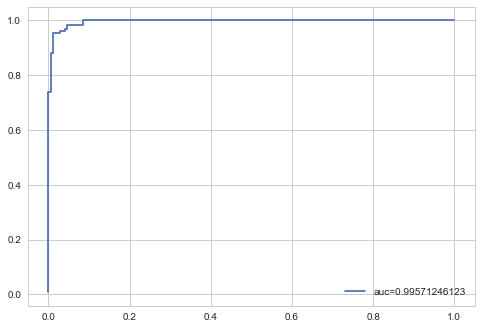

In [242]:
plot_roc_curve(y_test, test_prob1)

## Gaussian - Naive Bayes

In [257]:
X_train_final_B_NB =  X_train_final[['x6','x7','x8','x9']]
X_test_final_B_NB=  X_test_final[['x6','x7','x8','x9']]

In [258]:
clf = BernoulliNB()
model_classif_cv(clf, X_train_final_B_NB, y_train, cv_kfold, metrics)

,f1_score- 1.Treino,f1_score- 2.Teste,precision_score- 1.Treino,precision_score- 2.Teste,recall_score- 1.Treino,recall_score- 2.Teste,accuracy_score- 1.Treino,accuracy_score- 2.Teste,ks - 1.Treino,ks - 2.Teste
0,0.748911,0.748092,0.598608,0.597561,1.0,1.0,0.703259,0.717949,0.467692,0.514706
1,0.755102,0.716418,0.606557,0.558140,1.0,1.0,0.711835,0.675214,0.481481,0.449275
2,0.744868,0.768116,0.593458,0.623529,1.0,1.0,0.701544,0.726496,0.471125,0.500000
3,0.756204,0.711111,0.607981,0.551724,1.0,1.0,0.713551,0.666667,0.484568,0.434783
4,0.741840,0.780822,0.589623,0.640449,1.0,1.0,0.702055,0.724138,0.479042,0.457627
5,0.745614,0.764706,0.594406,0.619048,1.0,1.0,0.702055,0.724138,0.471125,0.500000
mean,0.748757,0.748211,0.598439,0.598409,1.0,1.0,0.705716,0.705767,0.475839,0.476065


In [259]:
model_classif_holdout(clf, X_train_final, y_train, X_test_final, y_test, metrics)

,1.Treino,2.Teste
f1_score,0.801964,0.796813
precision_score,0.805921,0.800000
recall_score,0.798046,0.793651
accuracy_score,0.827143,0.830000
KS,0.668482,0.654625


In [260]:
#model
model = clf.fit(X_train_final_B_NB, y_train)

y_test_pred = model.predict(X_test_final_B_NB)
y_train_pred = model.predict(X_train_final_B_NB)

test_probs = pd.DataFrame(model.predict_proba(X_test_final_B_NB), columns = ['prob0', 'prob1'])
train_probs = pd.DataFrame(model.predict_proba(X_train_final_B_NB), columns = ['prob0', 'prob1'])

test_prob1 = test_probs.iloc[:,1]
test_prob0 = test_probs.iloc[:,0]
train_prob1 = train_probs.iloc[:,1]
train_prob0 = train_probs.iloc[:,0]

metrics_output(y_test, y_test_pred, test_prob1, test_prob0)

   accuracy       auc        f1  precision  recall
0      0.71  0.735062  0.743363   0.591549     1.0


             precision    recall  f1-score   support

          0       1.00      0.50      0.67       174
          1       0.59      1.00      0.74       126

avg / total       0.83      0.71      0.70       300



Matriz de confusão:
    0    1
0  87   87
1   0  126
